# <b>Section 3: Data Modeling</b>

### <b><u>Step 0</u>: Download library for support</b>

In [1]:
! pip install ipynb

### <b><u>Step 1</u>: Import library</b>

These are the main libraries used for data crawling:
- `sys`: Spotipy is a lightweight Python library for the Spotify Web API. With Spotipy you get full access to all of the music data provided by the Spotify platform.
- `numpy`: used to get spotipy's client_id, secret and redirect uri in .env file
- `pandas`: used to get accessed to .env files in system
- `matplotlib`: used to support write data to csv files
- `sklearn`: used to support write data to csv files

In [2]:
import sys
sys.path.insert(0, '../../data_exploration/components/')
sys.path.insert(0, '../../data')

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression as lr
from ipynb.fs.full.songs_data_exploration import songs_model_df

day la markdown

In [4]:
train_features, test_features, train_label, test_label = train_test_split(songs_model_df.iloc[:, :-1], songs_model_df.iloc[:, -1], test_size = 0.2)

day la markdown

In [5]:
train_features.shape, train_label.shape, test_features.shape, test_label.shape

((2400, 6), (2400,), (600, 6), (600,))

day la markdown

In [6]:
class LinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T
        self.w = X_pinv @ y
        return self

    def get_weight(self):
        return self.w

    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)

def model_rmse(y_test, y_pred):
    return np.sqrt(np.mean((y_test.ravel() - y_pred.ravel())**2))

day la markdown

In [7]:
model1 = LinearRegression().fit(train_features, train_label)

In [8]:
y_pred = model1.predict(test_features)
result1 = pd.DataFrame(y_pred, columns=['popularity'])
result1[result1['popularity'] < 0] = 0
print(model_rmse(test_label, y_pred))
result1.head()

5.637175180642582


,popularity
2366,52.812383
2845,67.838524
2946,71.202338
1362,69.553641
950,82.596749


In [9]:
def train_each_feature_cross_validation(train, fold = 5):
    feature = {k: 0 for k in train.columns if k != 'popularity'}

    for train_split, test_split in KFold(n_splits=fold, shuffle=True).split(train):
        for column in feature.keys():
            feature_train = np.array(train.iloc[train_split].loc[:,[column]])
            label_train = np.array(train.iloc[train_split].loc[:,['popularity']])

            feature_test = np.array(train.iloc[test_split].loc[:,[column]])
            label_test = np.array(train.iloc[test_split].loc[:,['popularity']])
                
            model = LinearRegression().fit(feature_train, label_train)
            pred = model.predict(feature_test)
            rmse = model_rmse(label_test, pred)

            feature[column] += rmse

    return {k: v/fold for k, v in feature.items()}

In [10]:
features = train_each_feature_cross_validation(pd.concat([train_features, train_label], axis=1))
best_feature = min(features, key=features.get)
best_feature

'album_popularity'

day la markdown

In [38]:
model2 = lr().fit(train_features, train_label)
pred = model2.predict(test_features)
result2 = pd.DataFrame(pred, columns=['popularity'])
result2[result2['popularity'] < 0] = 0
print(model_rmse(test_label, pred))
result2.head()

5.624682956884886


,popularity
0,52.712372
1,68.219953
2,70.731256
3,70.040612
4,82.088337


In [12]:
test_label.iloc[:5]

2366    56
2845    61
2946    60
1362    67
950     90
Name: popularity, dtype: int64

In [13]:
model2.score(test_features, test_label)

0.9603904785813943

### <b><u>Step 4</u>: Construct Gradient Descent functions</b>

compute_h

In [14]:
def compute_h(w, X):
    return np.sum(w.ravel() * X, axis=1)

sigmoid

In [15]:
def sigmoid_activation(X):
    return 1.0 / (1.0 + np.exp(-X.ravel()))

loss

In [16]:
def loss_function(y, y_pred):
    return .5 * sum((y - y_pred) ** 2)

compute gradient

In [17]:
def compute_gradient(y, y_pred, w, x_train):
    loss = (y - y_pred) * compute_h(w, x_train) * (1 - compute_h(w, x_train))
    grad = np.transpose(x_train) @ loss.reshape(-1, 1)
    return -grad

train gradient descent

In [18]:
def train_gradient_descent(w, x_train, y_train, num_epochs):
    for epoch in range(num_epochs):
        y_pred = sigmoid_activation(compute_h(w, x_train))
        grad = compute_gradient(y_train, y_pred, w, x_train)
        temp = w.reshape(-1) - grad.reshape(-1)
        w = temp.reshape(-1, 1)
        if epoch % 5 == 0:
            print(w)

    return w

In [19]:
model = compute_gradient(train_label.to_numpy(), sigmoid_activation(compute_h(model2.coef_, train_features.to_numpy())), model2.coef_, train_features.to_numpy())
model

array([[4.66321450e+15],
       [2.17498436e+10],
       [5.04549899e+10],
       [1.81954355e+10],
       [5.53764328e+13],
       [3.87245330e+08]])

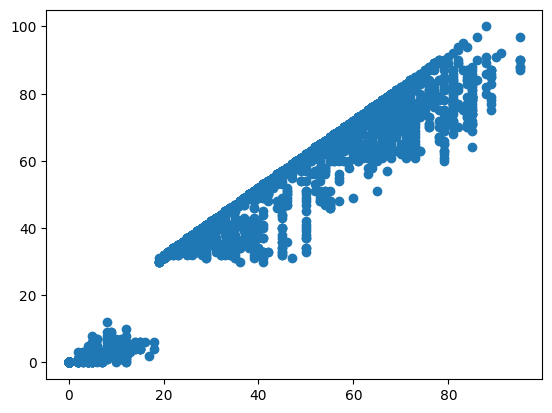

In [21]:
pred_all = model2.predict(songs_model_df.iloc[:,:-1])

plt.scatter(songs_model_df.loc[:, 'album_popularity'], songs_model_df.loc[:, 'popularity'])
# plt.plot(songs_model_df.loc[:, 'album_popularity'], pred_all, 'r-.')
plt.show()

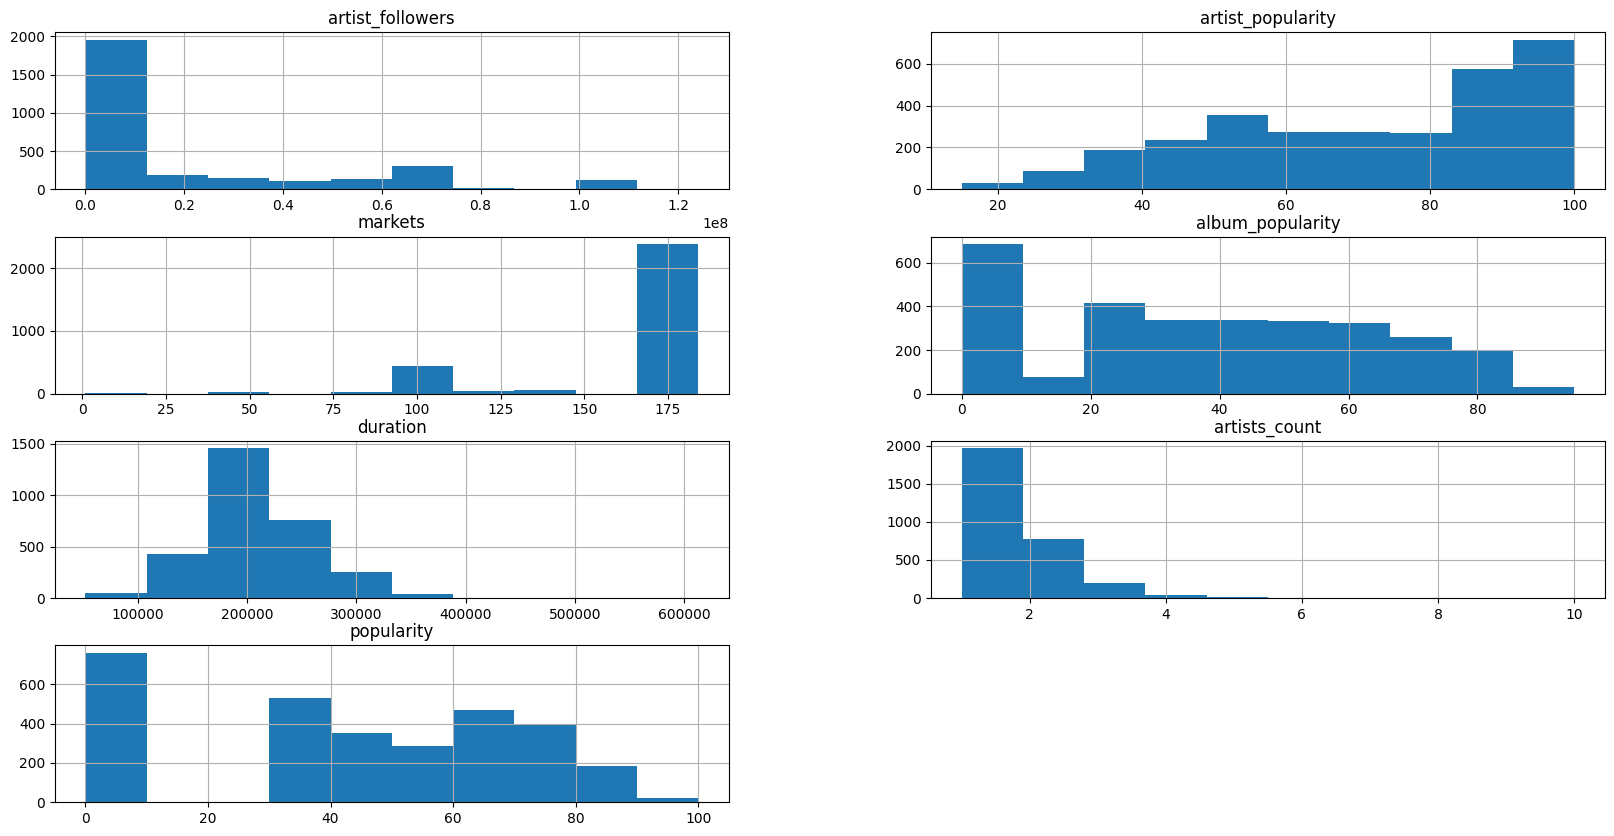

In [ ]:
songs_model_df.hist(layout=(4,2), figsize=(20,10))
plt.show()